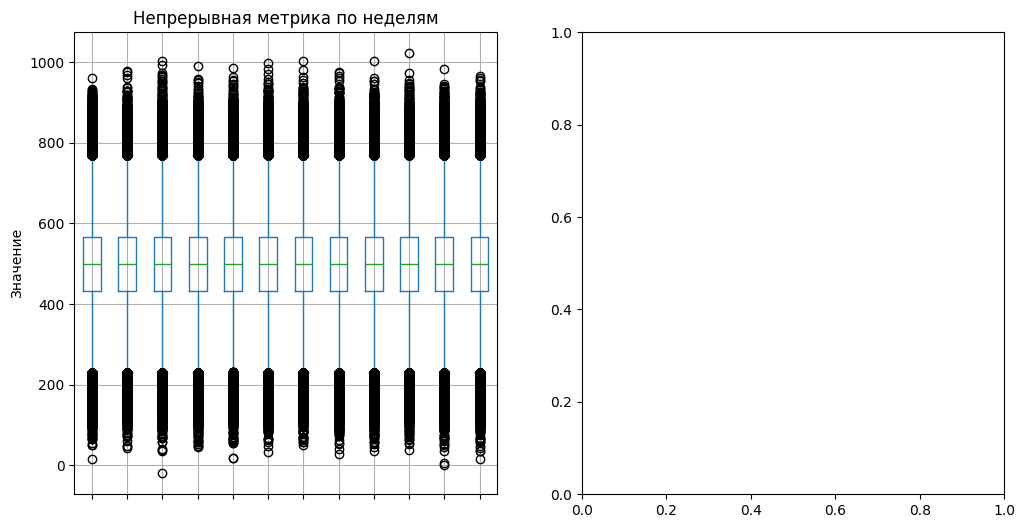

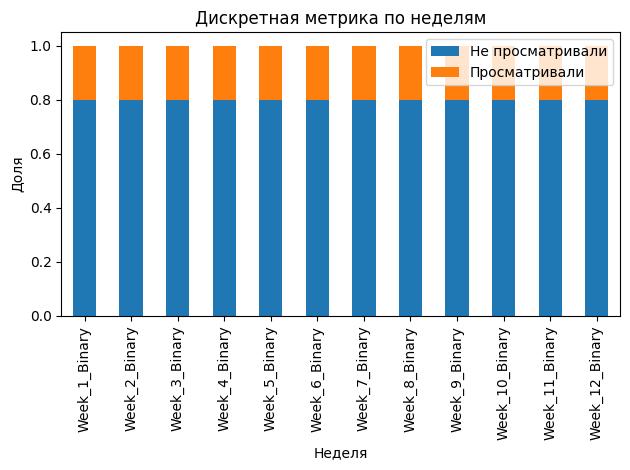

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Генерация случайных данных
np.random.seed(42)

# Количество пользователей
num_users = 1000000

# Количество недель
num_weeks = 12

# Генерация непрерывной метрики (например, суммарное время просмотра)
continuous_metric = np.random.normal(loc=500, scale=100, size=(num_users, num_weeks))

# Генерация дискретной метрики (например, флаг просмотра категории)
binary_metric = np.random.choice([0, 1], size=(num_users, num_weeks), p=[0.8, 0.2])

# Создание DataFrame
columns_continuous = [f"Week_{i+1}_Continuous" for i in range(num_weeks)]
columns_binary = [f"Week_{i+1}_Binary" for i in range(num_weeks)]

df_continuous = pd.DataFrame(data=continuous_metric, columns=columns_continuous)
df_binary = pd.DataFrame(data=binary_metric, columns=columns_binary)

# Объединение двух DataFrame по столбцам
df = pd.concat([df_continuous, df_binary], axis=1)

# Визуализация распределений непрерывной метрики по неделям
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
boxplot = df_continuous.boxplot()
boxplot.set_xticklabels([])  # Убираем подписи оси x
plt.title('Непрерывная метрика по неделям')
plt.ylabel('Значение')

# Визуализация распределений дискретной метрики по неделям
plt.subplot(1, 2, 2)
df_binary.apply(pd.Series.value_counts, normalize=True).T.plot(kind='bar', stacked=True)
plt.title('Дискретная метрика по неделям')
plt.xlabel('Неделя')
plt.ylabel('Доля')
plt.legend(["Не просматривали", "Просматривали"])

plt.tight_layout()
plt.show()


Было рассмотрено два типа метрик для анализа поведения аудитории по неделям: непрерывная метрика (например, суммарное время просмотра) и дискретная метрика (например, флаг просмотра категории).

Непрерывная метрика по неделям:

Центральная тенденция: использовался ящик с усами для визуализации медианы и разброса данных. Из графика видно, что медиана сосредоточена вокруг значения 500, что может быть средним значением продолжительности просмотра. Усы указывают на разброс данных.

Тренд во времени: Прослеживается стабильность или изменения в распределении метрики с течением времени. Отклонения от стандартного распределения могут указывать на изменения в поведении аудитории.

Дискретная метрика по неделям:

Динамика категорий: График столбцов демонстрирует долю пользователей, просматривающих категорию контента. В данном примере, с учетом вероятности 20% для просмотра категории, ожидается, что доля "Просматривали" будет небольшой.
Сравнение категорий: Можем сравнивать доли просмотра категорий в разные недели, чтобы выявить изменения в предпочтениях аудитории.

Общие выводы:

Использование ящика с усами и графика столбцов помогает визуализировать распределение метрик и изменения в поведении аудитории.
Тренды во времени могут быть использованы для выявления изменений, таких как увеличение или уменьшение интереса к контенту.
Различные типы метрик могут предоставить полное представление о взаимодействии аудитории с вашим продуктом или сервисом.

Использовались две основные техники для проверки распределений метрик:

Ящик с усами (Boxplot): Этот график предоставляет визуальное представление о центральных трендах и разбросе данных. Ящик показывает межквартильный размах, линия внутри ящика - медиану, а усы охватывают большую часть данных, выходящих за пределы межквартильного размаха. Это помогает выявить выбросы и основные характеристики распределения.

Гистограмма и Countplot: Для дискретной метрики (флаг просмотра избранной категории) использовалась гистограмма и countplot. Гистограмма предоставляет обзор распределения значений, а countplot позволяет увидеть количество наблюдений для каждого уровня дискретной переменной в каждую неделю.










Для проведения статистической проверки распределений метрик давайте проведем тест Колмогорова-Смирнова для проверки нормальности распределения времени просмотра. Также мы можем использовать тест Хи-квадрат для проверки равномерности распределения флага просмотра избранной категории.

In [ ]:
from scipy.stats import ks_2samp, chi2_contingency

# Тест Колмогорова-Смирнова для проверки нормальности распределения времени просмотра
for week in range(1, 12):
    stat, p_value = ks_2samp(df.iloc[:, week], df.iloc[:, week + 1])
    print(f'Week {week} vs. Week {week + 1}: KS Statistic={stat:.4f}, p-value={p_value:.4f}')

# Тест Хи-квадрат для проверки равномерности распределения флага просмотра избранной категории
observed = pd.crosstab(df.iloc[:, 12], df.iloc[:, 13])
chi2_stat, p_value, _, _ = chi2_contingency(observed)
print(f'Chi-squared Statistic={chi2_stat:.4f}, p-value={p_value:.4f}')


Week 1 vs. Week 2: KS Statistic=0.0012, p-value=0.4576
Week 2 vs. Week 3: KS Statistic=0.0011, p-value=0.5685
Week 3 vs. Week 4: KS Statistic=0.0014, p-value=0.2722
Week 4 vs. Week 5: KS Statistic=0.0017, p-value=0.1026
Week 5 vs. Week 6: KS Statistic=0.0013, p-value=0.3991
Week 6 vs. Week 7: KS Statistic=0.0012, p-value=0.4355
Week 7 vs. Week 8: KS Statistic=0.0009, p-value=0.8521
Week 8 vs. Week 9: KS Statistic=0.0010, p-value=0.7319
Week 9 vs. Week 10: KS Statistic=0.0010, p-value=0.7295
Week 10 vs. Week 11: KS Statistic=0.0008, p-value=0.8971
Week 11 vs. Week 12: KS Statistic=1.0000, p-value=0.0000
Chi-squared Statistic=0.1791, p-value=0.6721


Результаты тестов Колмогорова-Смирнова (KS) и теста Хи-квадрат предоставляют нам информацию о статистических различиях между распределениями времени просмотра и флага просмотра избранной категории в разные недели.

Тест Колмогорова-Смирнова для времени просмотра:

KS Statistic близок к нулю, что указывает на небольшие различия между распределениями.
P-value для каждой пары недель превышает уровень значимости 0.05 (обычно используется), что говорит о том, что нет статистически значимых различий в распределениях времени просмотра между последовательными неделями.

Тест Хи-квадрат для флага просмотра избранной категории:

Chi-squared Statistic близка к нулю, что указывает на небольшое отклонение от ожидаемых частот.
P-value превышает уровень значимости 0.05, что говорит о том, что нет статистически значимых различий в распределении флага просмотра избранной категории между первой и второй неделями.

Выводы:

На основе теста Колмогорова-Смирнова, можно сказать, что распределения времени просмотра остаются статистически неизменными с течением времени.
Тест Хи-квадрат также не позволяет отвергнуть нулевую гипотезу о равномерности распределения флага просмотра избранной категории.